Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/loan.csv")

In [ ]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [ ]:
df.tail()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved
60,38,Male,Chef,Associate's,Married,65000,700,Approved


In [ ]:
df.shape

(61, 8)

Encoding the category

In [ ]:
label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
df.drop(columns=['gender'],inplace=True)
print(df.head())

   age  occupation education_level marital_status  income  credit_score  \
0   32    Engineer      Bachelor's        Married   85000           720   
1   45     Teacher        Master's         Single   62000           680   
2   28     Student     High School         Single   25000           590   
3   51     Manager      Bachelor's        Married  105000           780   
4   36  Accountant      Bachelor's        Married   75000           710   

  loan_status  gender_encoded  
0    Approved               1  
1    Approved               0  
2      Denied               1  
3    Approved               0  
4    Approved               1  


In [ ]:
label_encoder = LabelEncoder()
df['occupation_encoded'] = label_encoder.fit_transform(df['occupation'])
df.drop(columns=['occupation'],inplace=True)
print(df.head())

   age education_level marital_status  income  credit_score loan_status  \
0   32      Bachelor's        Married   85000           720    Approved   
1   45        Master's         Single   62000           680    Approved   
2   28     High School         Single   25000           590      Denied   
3   51      Bachelor's        Married  105000           780    Approved   
4   36      Bachelor's        Married   75000           710    Approved   

   gender_encoded  occupation_encoded  
0               1                  12  
1               0                  35  
2               1                  33  
3               0                  16  
4               1                   0  


In [ ]:
label_encoder = LabelEncoder()
df['education_level_encoded'] = label_encoder.fit_transform(df['education_level'])
df.drop(columns=['education_level'],inplace=True)
print(df.head())

   age marital_status  income  credit_score loan_status  gender_encoded  \
0   32        Married   85000           720    Approved               1   
1   45         Single   62000           680    Approved               0   
2   28         Single   25000           590      Denied               1   
3   51        Married  105000           780    Approved               0   
4   36        Married   75000           710    Approved               1   

   occupation_encoded  education_level_encoded  
0                  12                        1  
1                  35                        4  
2                  33                        3  
3                  16                        1  
4                   0                        1  


In [ ]:
label_encoder = LabelEncoder()
df['marital_status_encoded'] = label_encoder.fit_transform(df['marital_status'])
df.drop(columns=['marital_status'],inplace=True)
print(df.head())

   age  income  credit_score loan_status  gender_encoded  occupation_encoded  \
0   32   85000           720    Approved               1                  12   
1   45   62000           680    Approved               0                  35   
2   28   25000           590      Denied               1                  33   
3   51  105000           780    Approved               0                  16   
4   36   75000           710    Approved               1                   0   

   education_level_encoded  marital_status_encoded  
0                        1                       0  
1                        4                       1  
2                        3                       1  
3                        1                       0  
4                        1                       0  


In [ ]:
label_encoder = LabelEncoder()
df['loan_status_encoded'] = label_encoder.fit_transform(df['loan_status'])
df.drop(columns=['loan_status'],inplace=True)
print(df.head())

   age  income  credit_score  gender_encoded  occupation_encoded  \
0   32   85000           720               1                  12   
1   45   62000           680               0                  35   
2   28   25000           590               1                  33   
3   51  105000           780               0                  16   
4   36   75000           710               1                   0   

   education_level_encoded  marital_status_encoded  loan_status_encoded  
0                        1                       0                    0  
1                        4                       1                    0  
2                        3                       1                    1  
3                        1                       0                    0  
4                        1                       0                    0  


In [ ]:
df.isnull().sum()

age                        0
income                     0
credit_score               0
gender_encoded             0
occupation_encoded         0
education_level_encoded    0
marital_status_encoded     0
loan_status_encoded        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      61 non-null     int64
 1   income                   61 non-null     int64
 2   credit_score             61 non-null     int64
 3   gender_encoded           61 non-null     int64
 4   occupation_encoded       61 non-null     int64
 5   education_level_encoded  61 non-null     int64
 6   marital_status_encoded   61 non-null     int64
 7   loan_status_encoded      61 non-null     int64
dtypes: int64(8)
memory usage: 3.9 KB


Data Visualization


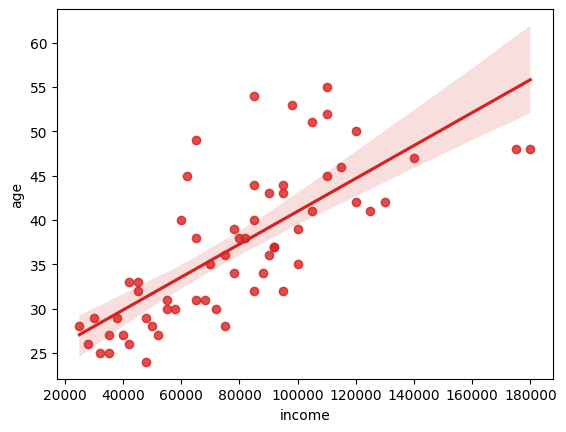

In [ ]:
red_palette = sns.color_palette("Reds_r")
sns.regplot(x="income", y="age",data=df, color=red_palette[-5]);

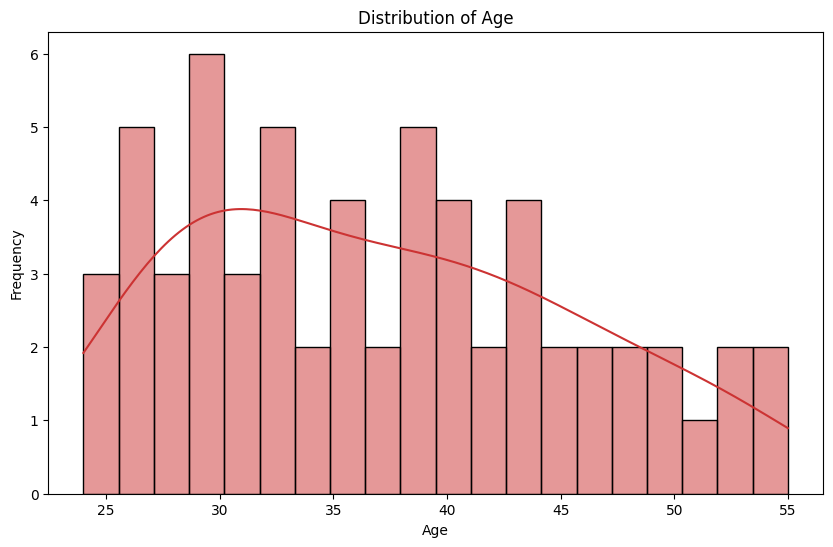

In [ ]:
#Distribution of Age

plt.figure(figsize = (10,6))
sns.histplot(data=df, x='age', bins=20, kde=True, color=[0.8, 0.2, 0.2])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Figure size 400x400 with 0 Axes>

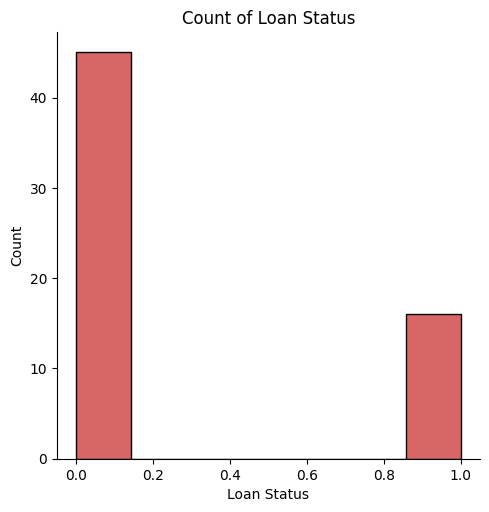

In [ ]:
#Displot of loan status

plt.figure(figsize=(4, 4))
sns.displot(data=df, x='loan_status_encoded',color=[0.8, 0.2, 0.2])
plt.title('Count of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

<ipython-input-93-80feda462a01>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status_encoded', y='income', palette=red_palette)
<ipython-input-93-80feda462a01>:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(data=df, x='loan_status_encoded', y='income', palette=red_palette)


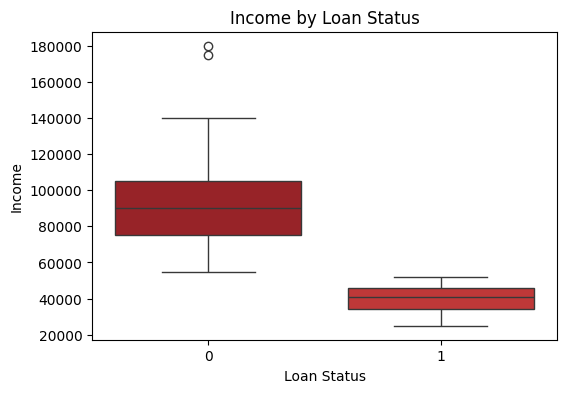

In [ ]:
#Boxplot of income by loan status

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='loan_status_encoded', y='income', palette=red_palette)
plt.title('Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Income')
plt.show()

<ipython-input-74-56ff4af9625b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender_encoded', palette=red_palette)
<ipython-input-74-56ff4af9625b>:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=df, x='gender_encoded', palette=red_palette)


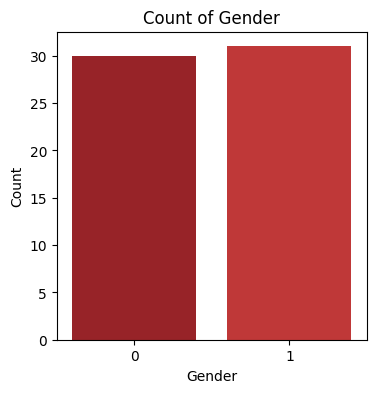

In [ ]:
#Count of gender

plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='gender_encoded', palette=red_palette)
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<ipython-input-78-ee4b39678bec>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='education_level_encoded', palette=red_palette)
<ipython-input-78-ee4b39678bec>:4: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(data=df, x='education_level_encoded', palette=red_palette)


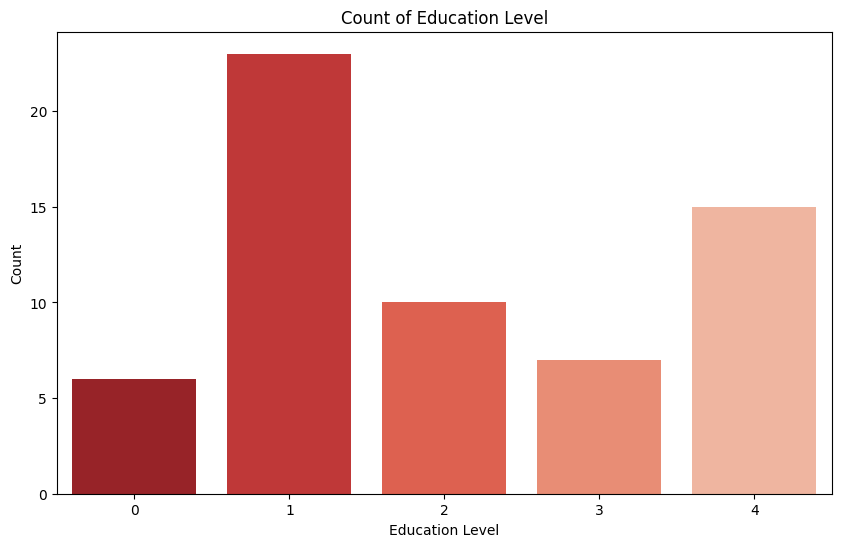

In [ ]:
#Count of education level

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education_level_encoded', palette=red_palette)
plt.title('Count of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

<ipython-input-92-08f63492a796>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='loan_status_encoded', y='credit_score', palette=red_palette)


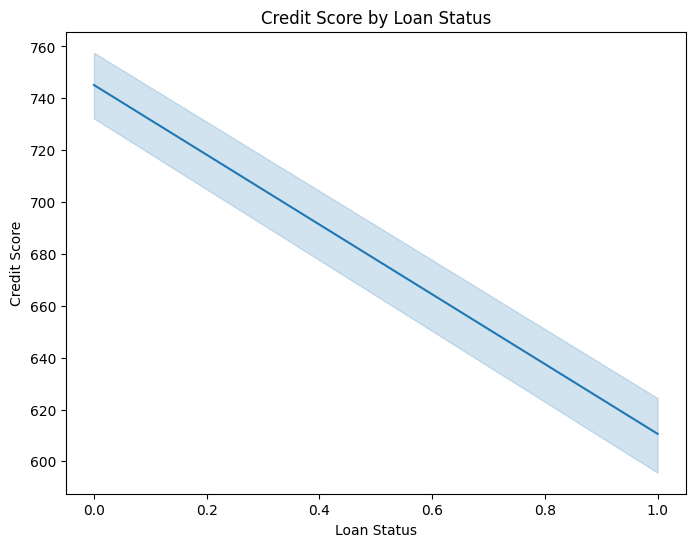

In [ ]:
# Lineplot of credit score by loan status

plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='loan_status_encoded', y='credit_score', palette=red_palette)
plt.title('Credit Score by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit Score')
plt.show()

<ipython-input-82-cefb2ce5d9cc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='occupation_encoded', palette=red_palette)
<ipython-input-82-cefb2ce5d9cc>:4: UserWarning: 
The palette list has fewer values (6) than needed (38) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, y='occupation_encoded', palette=red_palette)


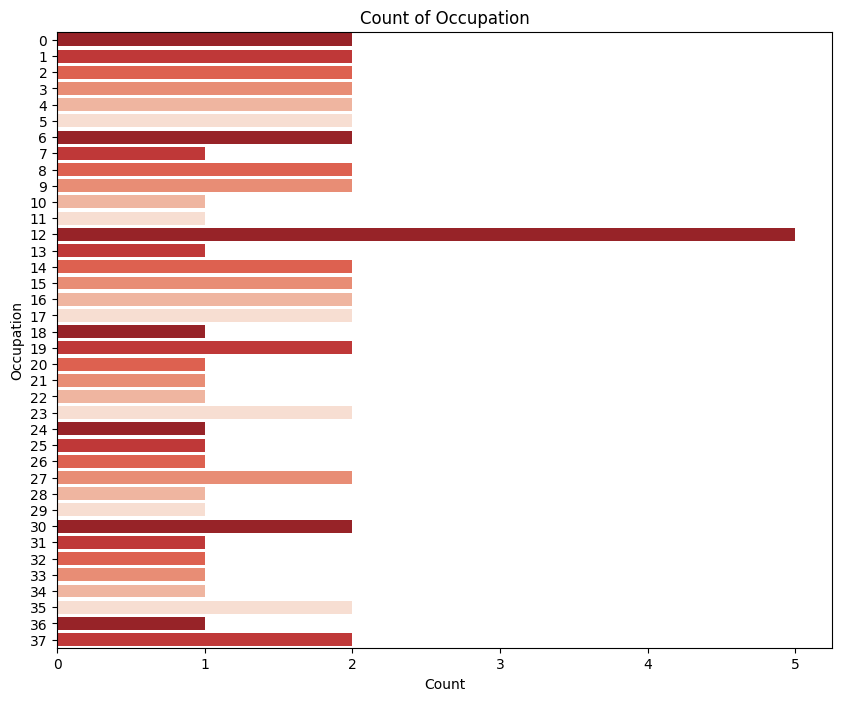

In [ ]:
#Count of occupation

plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='occupation_encoded', palette=red_palette)
plt.title('Count of Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

<ipython-input-101-a63b92690f3d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='marital_status_encoded', palette=red_palette)
<ipython-input-101-a63b92690f3d>:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=df, x='marital_status_encoded', palette=red_palette)


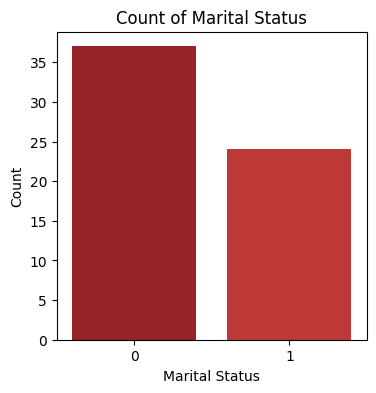

In [ ]:
#Count of marital status

plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='marital_status_encoded', palette=red_palette)
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

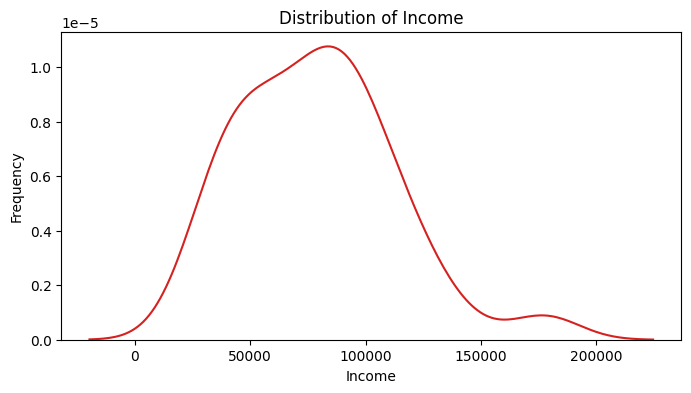

In [ ]:
#Distribution of income

plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='income', color= red_palette[-5])
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

<ipython-input-90-c2b720ce57ed>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='loan_status_encoded', y='income', palette=red_palette)
<ipython-input-90-c2b720ce57ed>:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.violinplot(data=df, x='loan_status_encoded', y='income', palette=red_palette)


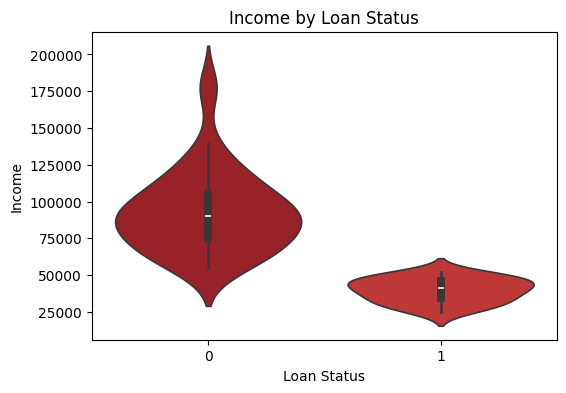

In [ ]:
#Violin plot of income by loan status

plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x='loan_status_encoded', y='income', palette=red_palette)
plt.title('Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Income')
plt.show()

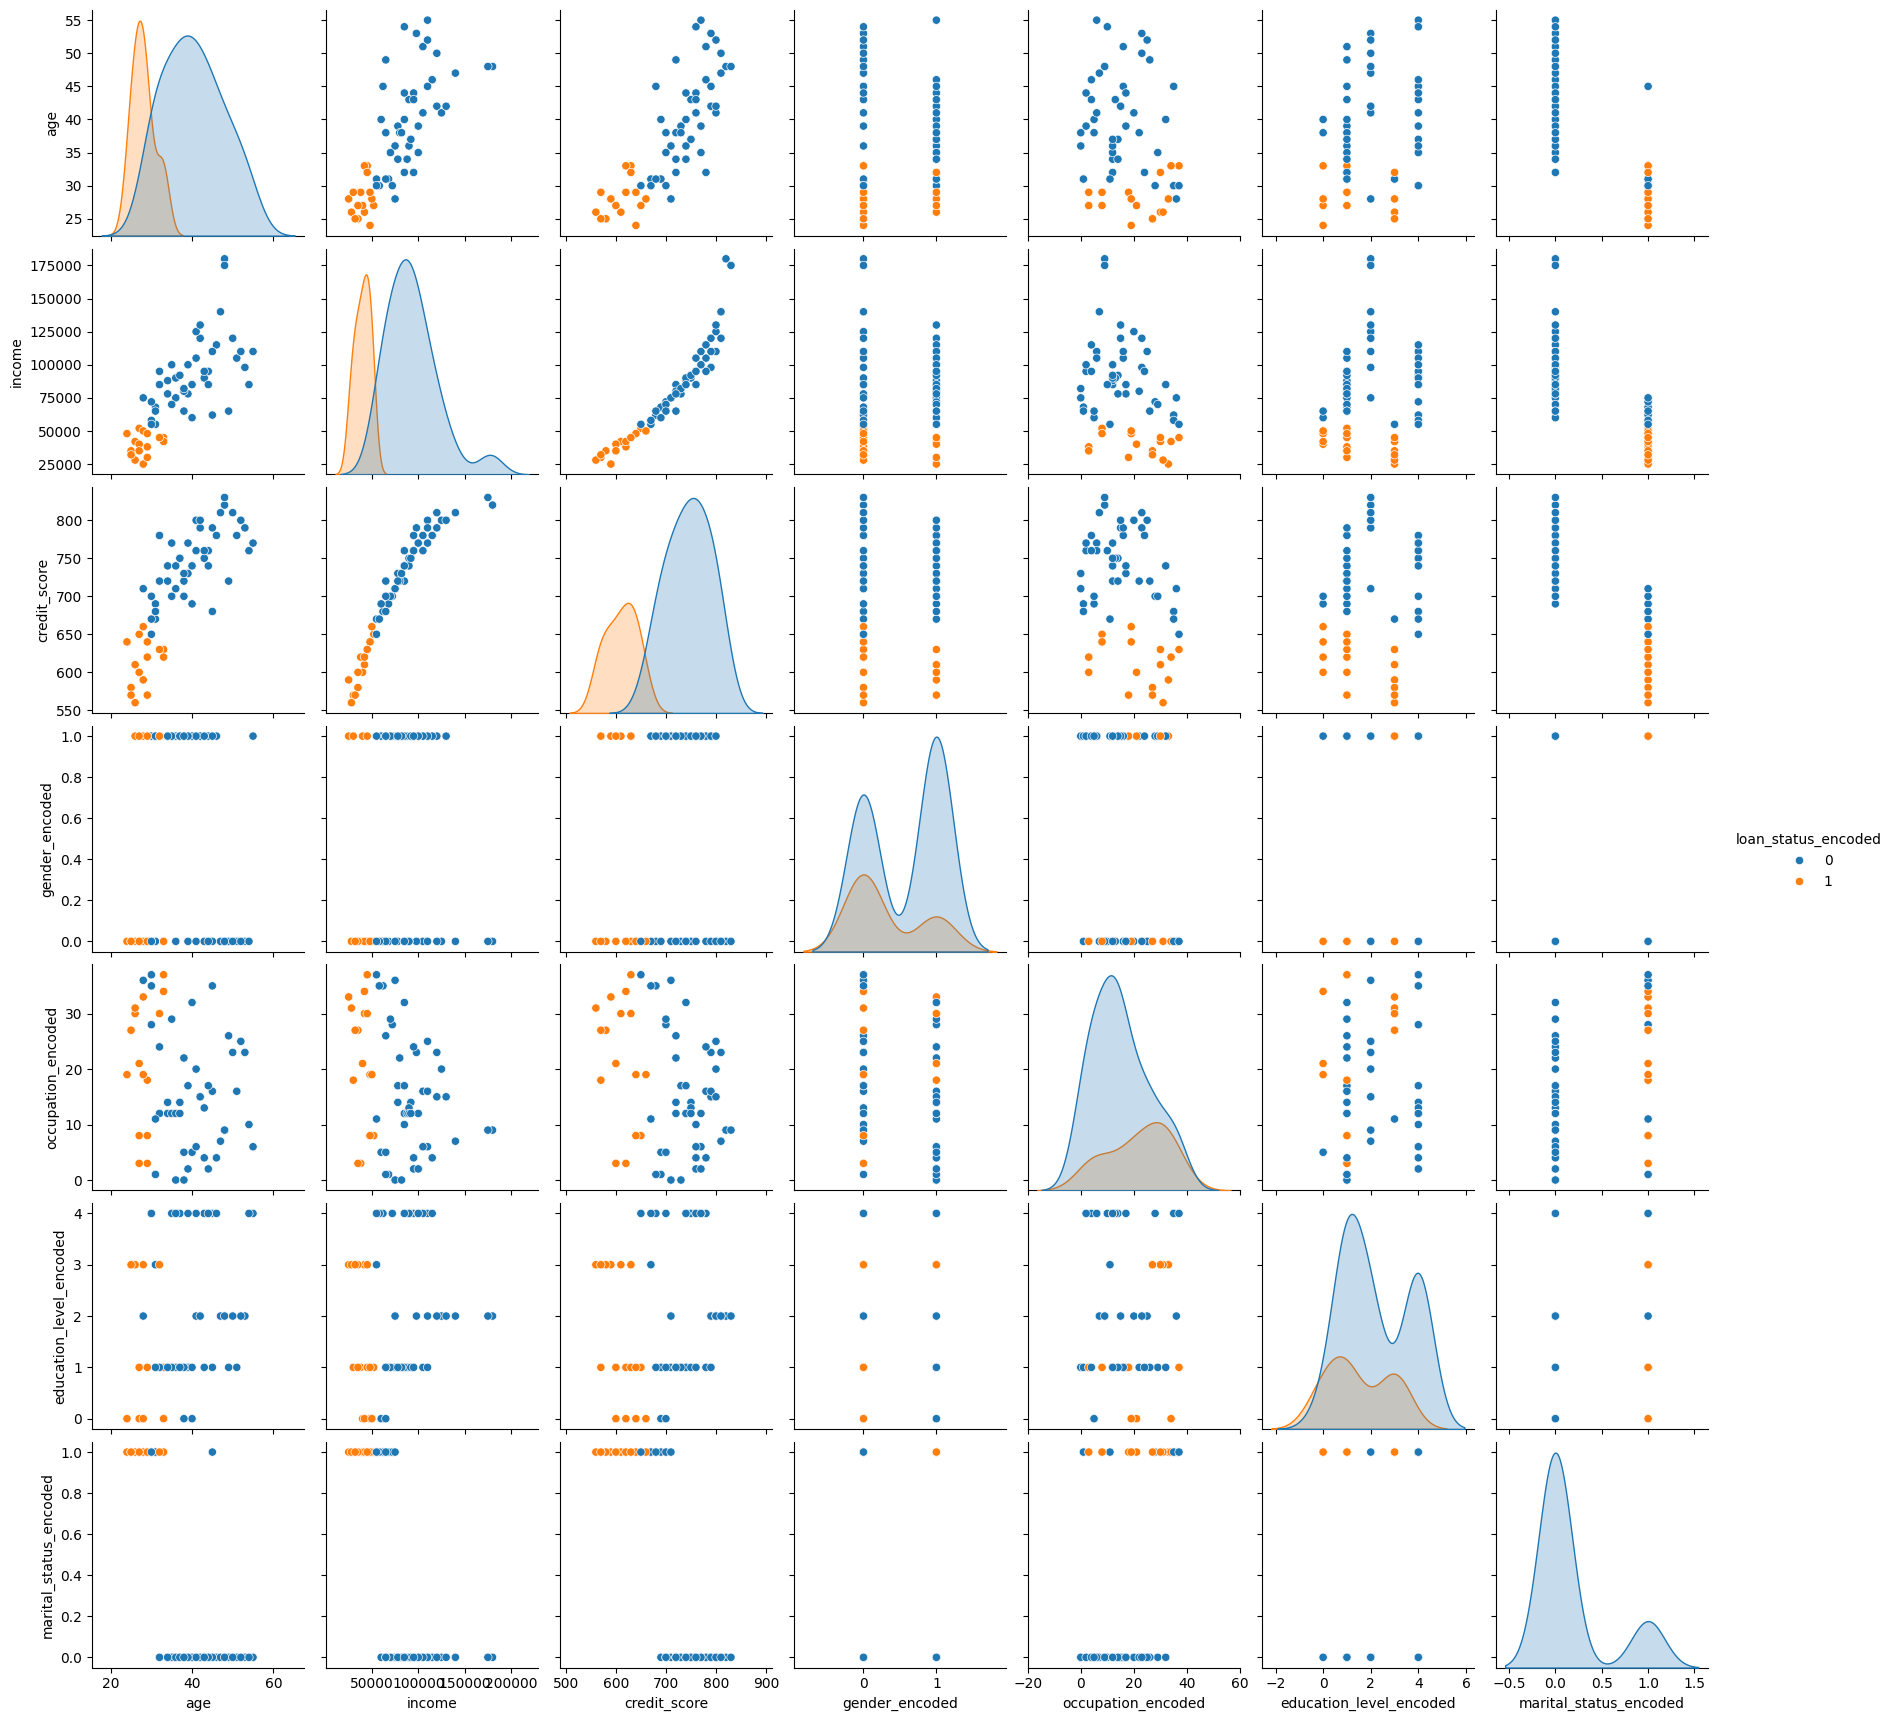

In [ ]:
#pairplot
sns.pairplot(df, hue='loan_status_encoded')
plt.show()

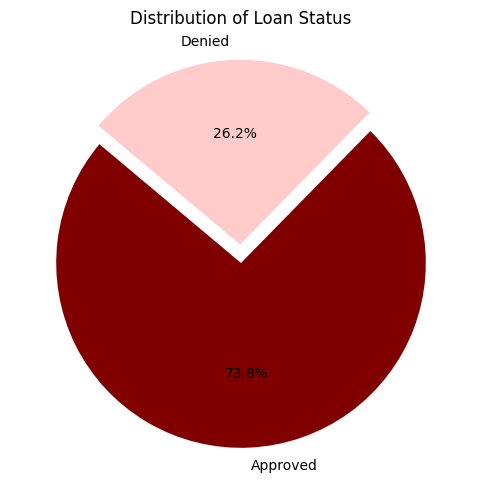

In [ ]:
#pie plot
loan_status_counts = df['loan_status_encoded'].value_counts()

labels = ['Approved', 'Denied']
colors = ['#800000', '#ffcccb']

plt.figure(figsize=(8, 6))
plt.pie(loan_status_counts,explode=[0,0.1],labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Status')
plt.show()

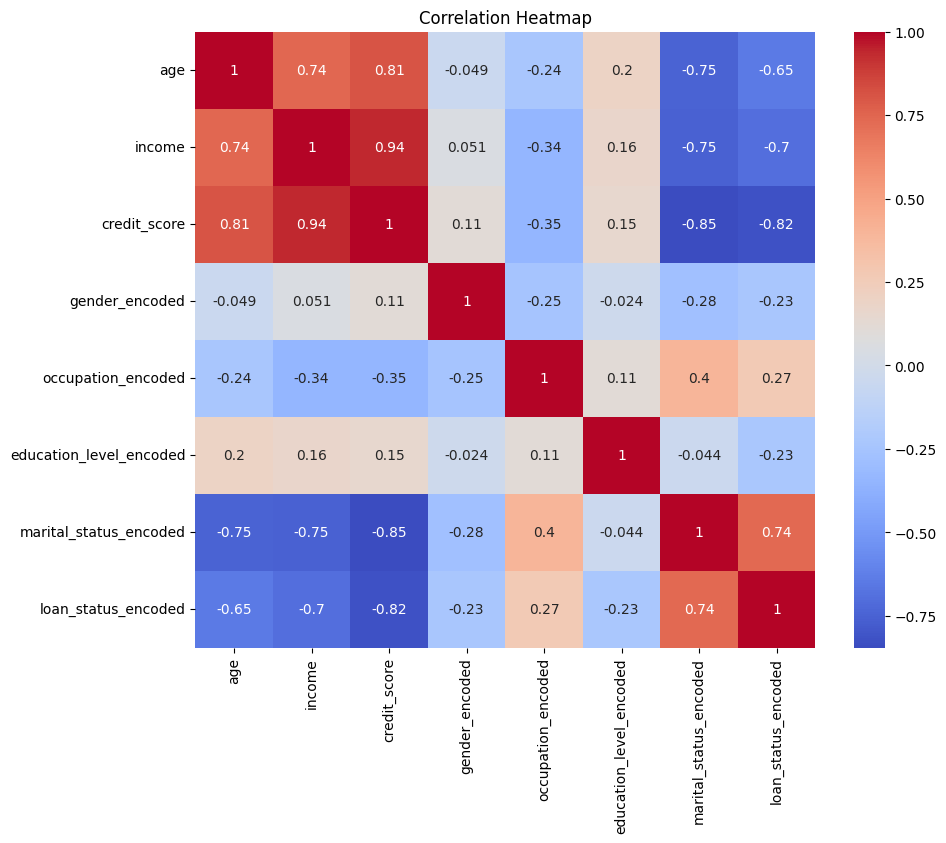

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Prepare the data

In [ ]:
X = df.drop(columns=['loan_status_encoded'])
Y = df['loan_status_encoded']

Split the data into training and testing sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

Building Model

In [ ]:
log_reg = LogisticRegression(solver = 'liblinear', random_state = 0)
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

Make Predictions

In [ ]:
Y_pred_train = log_reg.predict(X_train)
print(Y_pred_train)

[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 1 1 0 0 1 0 0 0]


In [ ]:
accuracy = accuracy_score(Y_train, Y_pred_train)
print("Accuracy Value: ", accuracy)

Accuracy Value:  1.0


In [ ]:
Y_pred_test = log_reg.predict(X_test)
print(Y_pred_test)

[0 1 1 0 0 0 0 0 0 0 0 0 1]


In [ ]:
accuracy = accuracy_score(Y_test, Y_pred_test)
print("Accuracy Value: ", accuracy)

Accuracy Value:  0.9230769230769231


Classification Report

In [ ]:
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.75      0.86         4

    accuracy                           0.92        13
   macro avg       0.95      0.88      0.90        13
weighted avg       0.93      0.92      0.92        13



Confusion Matrix:
[[9 0]
 [1 3]]


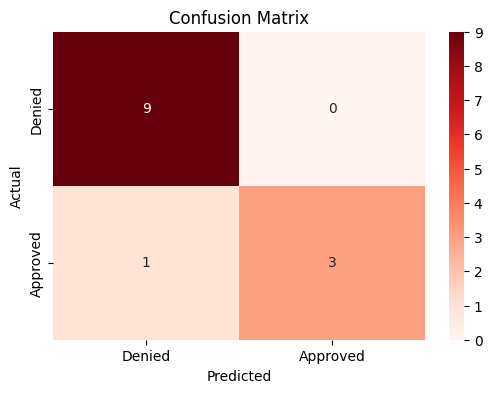

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_pred_test)

print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Denied', 'Approved'], yticklabels=['Denied', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()